In [61]:
conda install -c conda-forge category_encoders


CondaValueError: too few arguments, must supply command line package specs or --file


Note: you may need to restart the kernel to use updated packages.


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('vh_data15.csv')

pd.set_option('display.max_columns', None)

In [3]:
df.head()

,County_Density,Vaccine_Trust_Index,Personal_Responsibility,Trust_Science_Apolitical,Trust_Science_Politicians,Trust_Science_Media,Trust_Science_Community,Trust_National,Trust_State,Trust_Local,Trust_Media,Perceived_Risk,Perceived_Network_Risk,Doctor_Comfort,Fear_Needles,Condition_Pregnancy,Condition_Asthma,Condition_Lung,Condition_Diabetes,Condition_Immune,Condition_Obesity,Condition_Heart,Condition_Organ,County_Cases,County_Cases2wk,Male,Race,Age,PS_Index,Natural_Science_Literacy,College_Degree,Pandemic_Impact,Pandemic_Impact_Network,Infected_Personal,Infected_Network,Biden,Trump,Party_ID,Household_Income,Vaccine_Required,Evangelical,Vaccine_Hesitant
0,137.851795,0.000000,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078749,0.002252,1,1,67.0,0.500000,0.666667,0.0,0.0,0.0,0.0,0.0,No,Yes,Republican,1.0,0,1.0,1
1,38.751406,9.000000,5.0,8.0,4.0,6.0,9.0,8.0,2.0,7.0,7.0,10.0,9.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.071312,0.002439,1,1,70.0,0.500000,0.833333,1.0,4.5,5.0,0.0,0.0,Yes,No,Democrat,3.0,0,0.0,0
2,18.103752,8.666667,7.0,6.0,1.0,1.0,6.0,7.0,7.0,9.0,1.0,9.0,8.0,10.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.119295,0.002288,0,1,69.0,0.333333,1.000000,0.0,5.5,6.0,0.0,1.0,No,Yes,Republican,6.0,0,0.0,0
3,26.912917,4.000000,7.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,5.0,6.0,3.0,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.056909,0.001455,0,1,64.0,0.500000,0.833333,0.0,6.0,7.0,0.0,0.0,Yes,No,Democrat,4.0,0,1.0,1
4,1541.026670,7.000000,6.0,6.0,1.0,2.0,6.0,6.0,2.0,7.0,4.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082678,0.001198,1,1,56.0,0.333333,0.833333,1.0,2.5,2.5,0.0,1.0,Yes,Yes,Republican,3.0,0,1.0,0


In [4]:
# transform race column to 4 onehotencoding columns
# party_id, biden and trump columns to onehotencoding

In [5]:
df.shape

(3353, 42)

In [6]:
# convert column names to lower case
df.columns = df.columns.str.lower()

In [7]:
df.head()

,county_density,vaccine_trust_index,personal_responsibility,trust_science_apolitical,trust_science_politicians,trust_science_media,trust_science_community,trust_national,trust_state,trust_local,trust_media,perceived_risk,perceived_network_risk,doctor_comfort,fear_needles,condition_pregnancy,condition_asthma,condition_lung,condition_diabetes,condition_immune,condition_obesity,condition_heart,condition_organ,county_cases,county_cases2wk,male,race,age,ps_index,natural_science_literacy,college_degree,pandemic_impact,pandemic_impact_network,infected_personal,infected_network,biden,trump,party_id,household_income,vaccine_required,evangelical,vaccine_hesitant
0,137.851795,0.000000,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078749,0.002252,1,1,67.0,0.500000,0.666667,0.0,0.0,0.0,0.0,0.0,No,Yes,Republican,1.0,0,1.0,1
1,38.751406,9.000000,5.0,8.0,4.0,6.0,9.0,8.0,2.0,7.0,7.0,10.0,9.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.071312,0.002439,1,1,70.0,0.500000,0.833333,1.0,4.5,5.0,0.0,0.0,Yes,No,Democrat,3.0,0,0.0,0
2,18.103752,8.666667,7.0,6.0,1.0,1.0,6.0,7.0,7.0,9.0,1.0,9.0,8.0,10.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.119295,0.002288,0,1,69.0,0.333333,1.000000,0.0,5.5,6.0,0.0,1.0,No,Yes,Republican,6.0,0,0.0,0
3,26.912917,4.000000,7.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,5.0,6.0,3.0,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.056909,0.001455,0,1,64.0,0.500000,0.833333,0.0,6.0,7.0,0.0,0.0,Yes,No,Democrat,4.0,0,1.0,1
4,1541.026670,7.000000,6.0,6.0,1.0,2.0,6.0,6.0,2.0,7.0,4.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082678,0.001198,1,1,56.0,0.333333,0.833333,1.0,2.5,2.5,0.0,1.0,Yes,Yes,Republican,3.0,0,1.0,0


In [51]:
df['party_id'].value_counts()

Democrat       1194
Republican     1033
Independent    1008
Other party      72
Libertarian      45
Name: party_id, dtype: int64

In [8]:
# split data into feature matrix and target vector
target = 'vaccine_hesitant'
y = df[target]
X = df.drop(columns = target)

print(df.shape)
print(X.shape)
print(y.shape)

(3353, 42)
(3353, 41)
(3353,)


In [9]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2682, 41) (2682,)
(671, 41) (671,)


In [55]:
# establish a baseline
y.value_counts(normalize=True).max()

0.7548464062033999

In [13]:
# build a DecisionTree model
model_dt = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
);

In [14]:
# build a RandomForest model
model_rf = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25, random_state=42)
);

In [30]:
# get cross validation scores

# DecisionTree scores
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10, n_jobs=-1)

# RandomForest scores
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10, n_jobs=-1)

In [31]:
cv_scores_dt

array([0.82156134, 0.80669145, 0.81343284, 0.81343284, 0.85447761,
       0.82835821, 0.82462687, 0.80970149, 0.82089552, 0.83208955])

In [32]:
cv_scores_rf

array([0.85873606, 0.86988848, 0.87313433, 0.88059701, 0.89925373,
       0.89552239, 0.91044776, 0.90298507, 0.88432836, 0.87686567])

In [33]:
print('CV score DecisionTreeClassifier')
print('Mean CV accuracy score:', cv_scores_dt.mean())
print('STD CV accuracy score:', cv_scores_dt.std())
print('---' * 10)
print('CV score RandomForestClassifier')
print('Mean CV accuracy score:', cv_scores_rf.mean())
print('STD CV accuracy score:', cv_scores_rf.std())

CV score DecisionTreeClassifier
Mean CV accuracy score: 0.8225267713477225
STD CV accuracy score: 0.013171775124140628
------------------------------
CV score RandomForestClassifier
Mean CV accuracy score: 0.8851758863674194
STD CV accuracy score: 0.015587120267983427


In [68]:
clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25, random_state=42)
);

# create a hyper parameter grid for GridSearchCV model
param_grid = {
    'simpleimputer__strategy':['mean', 'median'],
    'randomforestclassifier__n_estimators': range(25, 125, 25),
    'randomforestclassifier__max_depth': range(5, 40, 5)
}

# instantiate GridSearch model
model_rfgs = GridSearchCV(clf,
                          param_grid=param_grid,
                          n_jobs=-1,
                          cv=5,
                          verbose=-1)

# fit our model
model_rfgs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=25,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(5, 40, 5),
                         'randomforestclassifier__n_estimators': range(25, 125, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=-1)

In [69]:
# look at best parameters for GridSearch model
model_rfgs.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'median'}

In [73]:
# look at the best score for GridSearch model
model_rfgs.best_score_

0.8888983851691264

In [74]:
# look at predictions for GridSearch model
model_rfgs.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
# instantiate RandomizedSearch model
model_rfrs = RandomizedSearchCV(clf,
                                param_distributions=param_grid,
                                n_jobs=-1,
                                cv=5,
                                verbose=-1)

# fit our model
model_rfrs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_estimators=25,
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': range(5, 40, 5),
                                        'randomforestclassifier__n_estimators': range(25, 125, 25),
                                        'simpleimputer__strategy': ['mean',
                                                                    'median']},
                   verbose=-1)

In [76]:
# look at best parameters for RandomizedSearch model
model_rfrs.best_params_

{'simpleimputer__strategy': 'mean',
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__max_depth': 25}

In [77]:
# look at best score for RandomizedSearch model
model_rfrs.best_score_

0.8870313238277884

In [78]:
# look at predictions for RandomizedSearch model
model_rfrs.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

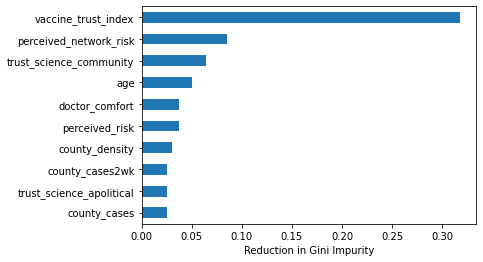

In [72]:
# plot feature importances of the better performing model (GridSearch)
bestimator = model_rfgs.best_estimator_
importances = bestimator.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity');